 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# 0) Set the path for each csv file
csv_path0 = Path(".\./Resources/whale_returns.csv")
csv_path1= Path(".\./Resources/algo_returns.csv")
csv_path2= Path(".\./Resources/sp500_history.csv")
csv_path3= Path(".\./Resources/aapl_historical.csv")
csv_path4=Path(".\./Resources/cost_historical.csv")
csv_path5=Path(".\./Resources/goog_historical.csv")
#set year variable to 252 representative of trading days in a year
year=252

In [6]:
# 1) read csv data into a variable
wdf_data = pd.read_csv(csv_path0, index_col='Date',parse_dates=True,infer_datetime_format=True)
adf_data = pd.read_csv(csv_path1, index_col='Date',parse_dates=True,infer_datetime_format=True)
spdf_data= pd.read_csv(csv_path2, index_col='Date',parse_dates=True,infer_datetime_format=True)

# 1a) doing the same as item 1 except this time im doing it for my chosen stocks
goog_data=pd.read_csv(csv_path5, index_col='Trade DATE', parse_dates=True,infer_datetime_format=True)
cost_data=pd.read_csv(csv_path4, index_col='Trade DATE', parse_dates=True,infer_datetime_format=True)
aapl_data=pd.read_csv(csv_path3, index_col='Trade DATE', parse_dates=True,infer_datetime_format=True)
# 1b) clean the data read in from sp500_history.csv
spdf_data['Close']=spdf_data['Close'].str.replace('$','')
spdf_data['Close']=spdf_data.astype(float)
spdf_data['S&P 500 Rets']=spdf_data['Close'].pct_change()

# 1c) if any nulls are present in our data it will be dropped
wdf_data.dropna(inplace=True)
adf_data.dropna(inplace=True)
spdf_data.dropna(inplace=True)
cost_data.dropna(inplace=True)
goog_data.dropna(inplace=True)
aapl_data.dropna(inplace=True)

C:\Users\Temp\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# 2b) make copys of the cleaned dataframes
Sp500=spdf_data.copy()
Algo=adf_data.copy()
Whale=wdf_data.copy()

#drop the Close columns which is not percentages but actual numerical values
SP=Sp500.drop(columns=['Close']).copy()
# Joining all daily return dataframes notice that we are dealing with percentages and not whole numbers. 
joined_df=Algo.merge(Whale,how='inner',on='Date')
joined_df=joined_df.merge(SP,how='inner',on='Date')
joined_df.dtypes
joined_df

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500 Rets
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577


# Conduct Quantitative Analysis


In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'S&P 500 Daily Returns'}, xlabel='Date'>

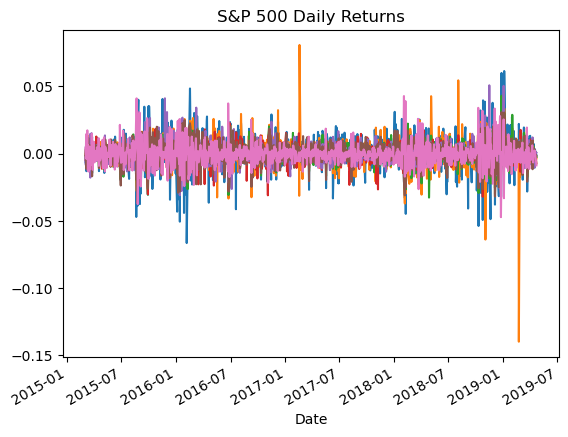

In [8]:
# Plot each column contained in the joined_df (all returns dataframe) and overlay them (this is done by default).

joined_df['BERKSHIRE HATHAWAY INC'].plot(title='Whale Portfolios Daily Returns')
joined_df['TIGER GLOBAL MANAGEMENT LLC'].plot(title='Tiger Global Management Portfolio Daily Returns')
joined_df['SOROS FUND MANAGEMENT LLC'].plot(title='SOROS FUND MANG. Portfolios Daily Returns')
joined_df['PAULSON & CO.INC. '].plot(title='Paulson & CO Portfolio Daily Returns')
joined_df['Algo 1'].plot(title='Alogorithm-1 based Daily Returns')
joined_df['Algo 2'].plot(title='Alogorithm-2 based Daily Returns')
joined_df['S&P 500 Rets'].plot(title='S&P 500 Daily Returns')

<AxesSubplot:xlabel='Date'>

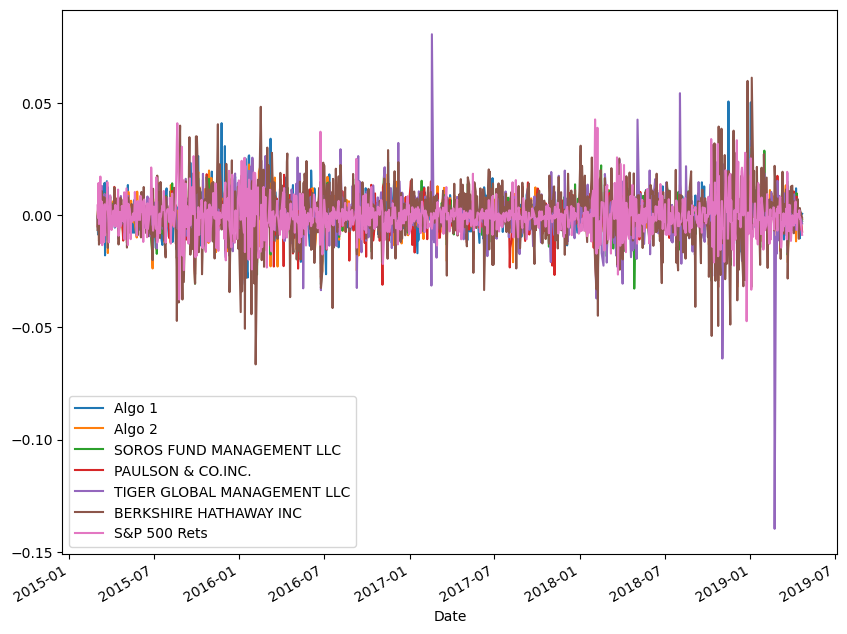

In [173]:
joined_df.plot(kind='line', legend=True,figsize=(10,8))

#### Calculate and Plot cumulative returns.

In [10]:
# Calculate cumulative returns of all portfolios
ANL_rtn=joined_df.mean()*year
ANL_rtn

Algo 1                         0.165729
Algo 2                         0.064132
SOROS FUND MANAGEMENT LLC      0.042981
PAULSON & CO.INC.             -0.054807
TIGER GLOBAL MANAGEMENT LLC   -0.022521
BERKSHIRE HATHAWAY INC         0.124430
S&P 500 Rets                  -0.070689
dtype: float64

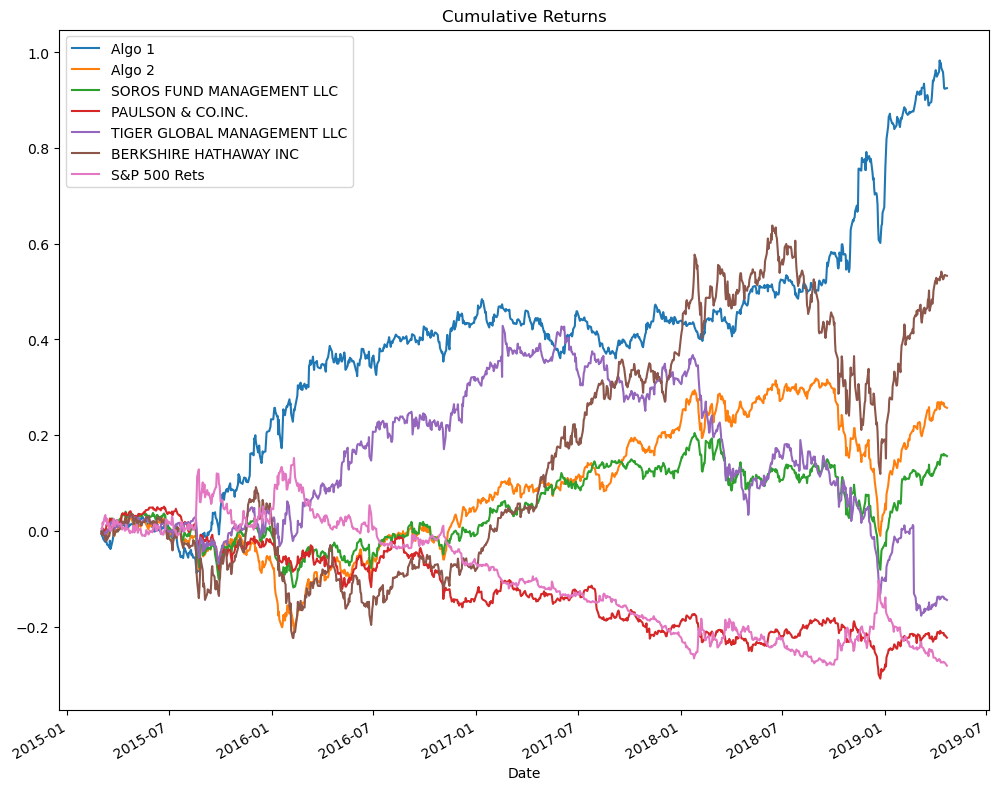

In [171]:
# Plot cumulative returns
cmltv_plot=((joined_df+1).cumprod()-1).plot(title='Cumulative Returns',figsize=(12,10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

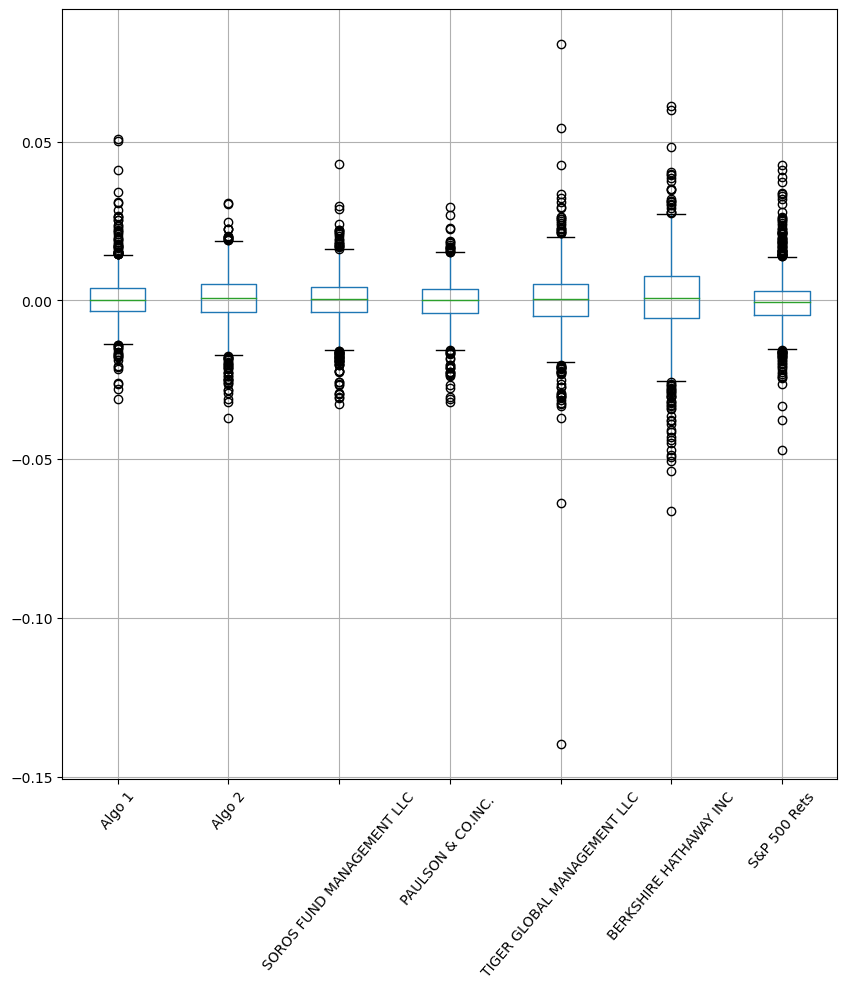

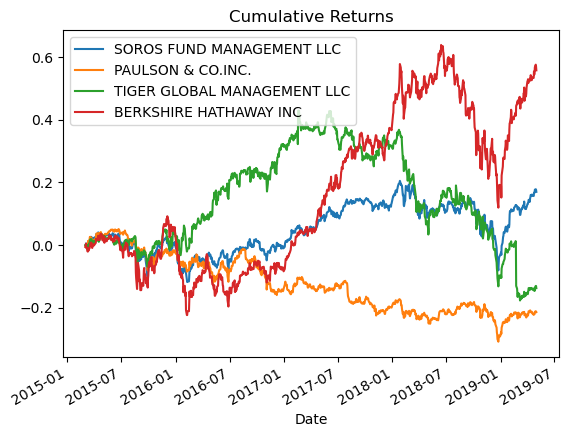

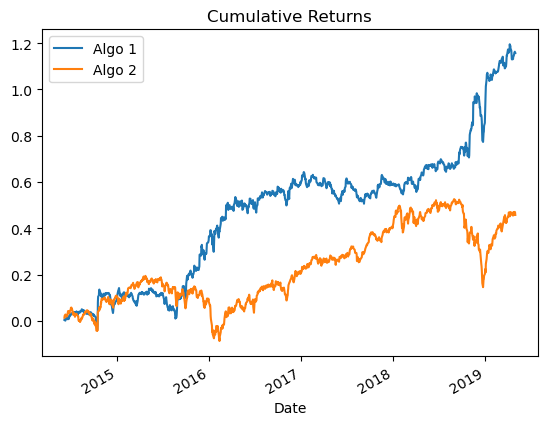

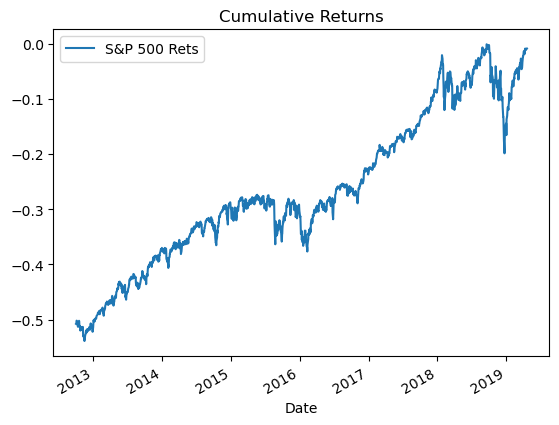

In [161]:
# Box plot to visually show risk
joined_df.boxplot(rot='50',figsize=(10,10))
# Plot cumulative returns
((Whale+1).cumprod()-1).plot(title='Cumulative Returns')
((Algo+1).cumprod()-1).plot(title='Cumulative Returns')
((SP+1).cumprod()-1).plot(title='Cumulative Returns')

### Calculate Standard Deviations

In [13]:
# Calculate the daily standard deviations of all portfolios
a_std=Algo.std
w_std=Whale.std
a_std
w_std

<bound method NDFrame._add_numeric_operations.<locals>.std of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03  

### Calculate the Annualized Standard Deviation

### Determine which portfolios are riskier than the S&P 500

In [14]:
# Calculate  the daily standard deviation of S&P 500
s_std=SP.std
s_std

<bound method NDFrame._add_numeric_operations.<locals>.std of             S&P 500 Rets
Date                    
2019-04-22     -0.008764
2019-04-18     -0.001011
2019-04-17     -0.001577
2019-04-16      0.002279
2019-04-15     -0.000509
...                  ...
2012-10-05      0.003469
2012-10-04      0.000322
2012-10-03     -0.007123
2012-10-02     -0.003611
2012-10-01     -0.000872

[1648 rows x 1 columns]>

In [110]:
joined_df.describe()
# Determine which portfolios are riskier than the S&P 500

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500 Rets
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,0.000658,0.000254,0.000171,-0.000217,-0.000089,0.000494,-0.000281
std,0.007623,0.008341,0.007896,0.007026,0.010897,0.012919,0.008587
min,-0.030951,-0.036937,-0.032711,-0.032099,-0.139820,-0.066505,-0.047250
25%,-0.003257,-0.003799,-0.003641,-0.004044,-0.004792,-0.005655,-0.004456
50%,0.000069,0.000698,0.000517,0.000000,0.000313,0.000726,-0.000450
75%,0.003874,0.005226,0.004320,0.003629,0.005233,0.007565,0.002881
max,0.050735,0.030822,0.042977,0.029338,0.080705,0.061341,0.042730


In [111]:
# Calculate the annualized standard deviation (252 trading days)
Annual_std=joined_df.std()*year**(1/2)
Annual_std

Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500 Rets                   0.136313
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

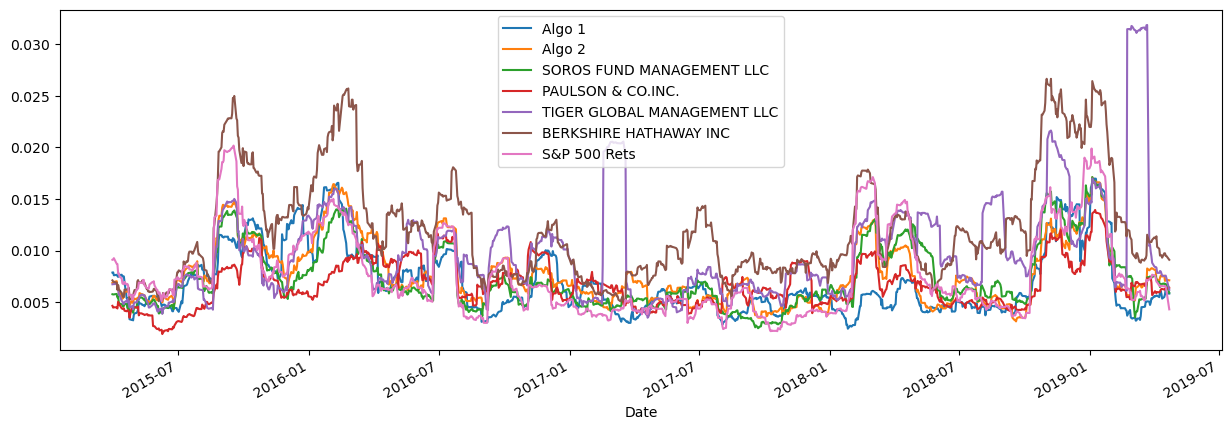

In [177]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_df.rolling(window=21).std().plot.line(figsize=(15,5))

### Calculate and plot the correlation

<AxesSubplot:>

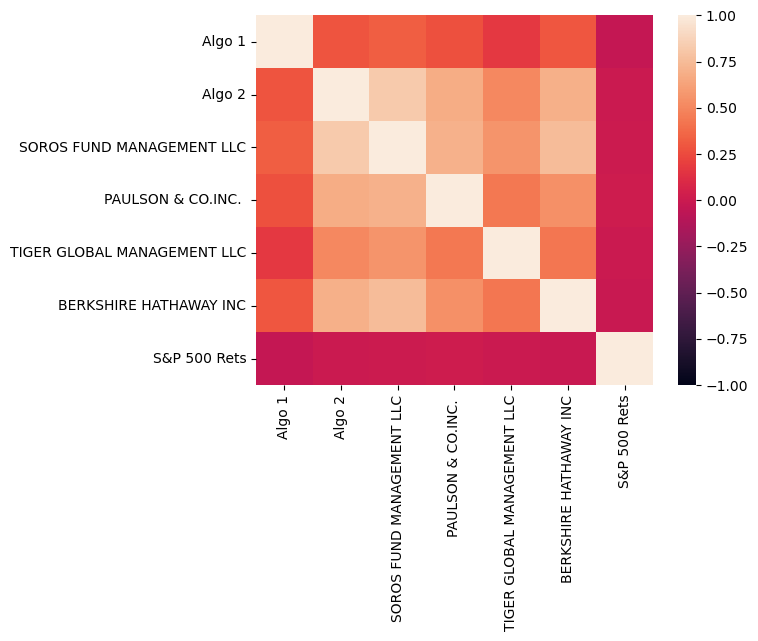

In [182]:
# Calculate the correlation
Correlation=joined_df.corr().copy()
# Display de correlation matrix
sns.heatmap(Correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [184]:
# Calculate covariance of a single portfolio
covariance=joined_df['BERKSHIRE HATHAWAY INC'].cov(joined_df['S&P 500 Rets'])
covariance

-1.5371091324717372e-06

In [189]:
# Calculate variance of S&P 500
variance=joined_df['S&P 500 Rets'].var()
variance

7.373467552840441e-05

In [187]:
# Computing beta
our_beta=covariance/variance
# Plot beta trend
our_beta

-0.020846489408902394

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

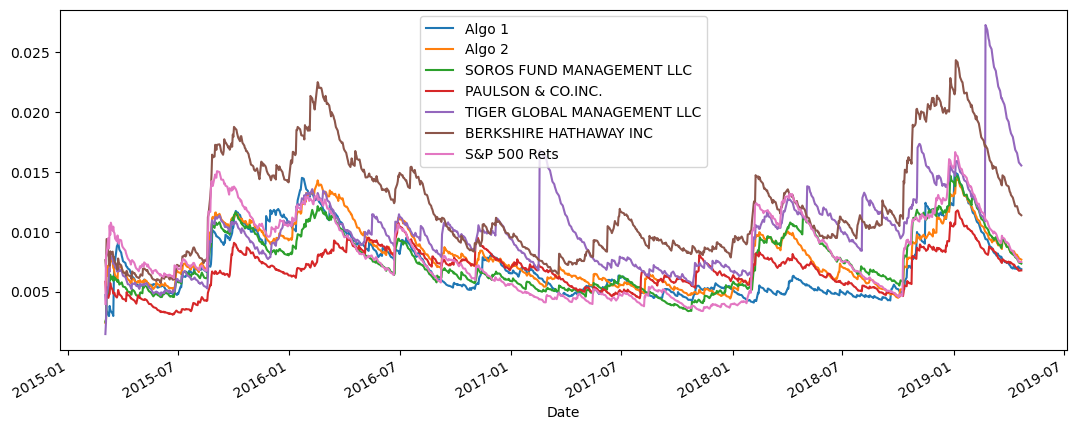

In [195]:
joined_df.ewm(halflife=21).std().plot(figsize=(13,5))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
Sharpe=(joined_df.mean()*year)/(joined_df.std()*np.sqrt(year))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

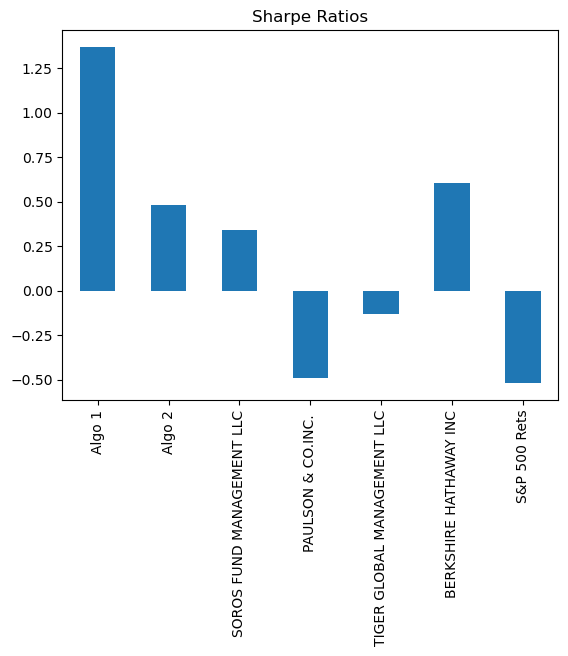

In [199]:
# Visualize the sharpe ratios as a bar plot
Sharpe.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [145]:
# Combine all stocks in a single DataFrame

Costco=cost_data.copy()
Cost=Costco.drop(columns=['Symbol']).copy()
Google=goog_data.copy()
Goog=Google.drop(columns=['Symbol']).copy()
Apple=aapl_data.copy()
Appl=Apple.drop(columns=['Symbol']).copy()
my_portfolio=Cost.merge(Goog,how='inner',on='Trade DATE')
my_portfolio=my_portfolio.merge(Appl,how='inner',on='Trade DATE')
my_portfolio.dropna(inplace=True)
my_portfolio.reset_index(inplace=True)
df = my_portfolio.rename(columns={'Trade DATE': 'Date','NOCP_x': 'COST', 'NOCP_y': 'GOOG','NOCP': 'APPL'})
df=df.set_index('Date')
# Calculate daily returns
# Drop NAs
# Display sample data
my_rets=df.pct_change()
my_rets

,COST,GOOG,APPL
Date,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,-0.008749,0.003347,0.010861
2019-05-07,-0.004806,0.006714,-0.000197
2019-05-06,0.016862,0.013023,0.027704
2019-05-03,0.001597,-0.003355,0.015685
...,...,...,...
2018-05-17,0.003217,0.011469,0.003650
2018-05-16,-0.004459,0.002948,0.006364
2018-05-15,-0.016255,-0.002348,-0.009246


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [235]:
# Set weights we can do this multiple ways I've changed from decimals point values to fractions
weights=[1/3,1/3,1/3]
#COST_weight=0.33
#GOOG_weight=0.33
#AAPL_weight=0.34

mine=my_rets.dot(weights)
my_returns=pd.DataFrame(mine)
# Calculate portfolio return
#test = COST_weight*my_rets['COST']+GOOG_weight*my_rets['GOOG']+AAPL_weight*my_rets['APPL']
# Display sample data
#test.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [246]:
# Join your returns DataFrame to the original returns DataFrame
All_returns=my_returns.merge(joined_df,how='inner', on='Date')
All_returns.rename(columns= {0:"My Returns"}, inplace = True )
All_returns

,My Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500 Rets
Date,,,,,,,,
2019-04-22,-0.011812,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764
2019-04-18,-0.001148,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,-0.001011
2019-04-17,-0.001541,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577
2019-04-16,-0.009149,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-15,-0.000326,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-16,0.001618,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-15,-0.009283,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044


In [247]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [254]:
# Calculate the annualized `std`
All_returns.std()
annualized_var=(All_returns.var()*year)
annualized_std_incl=np.sqrt(annualized_var)
annualized_std_incl

My Returns                     0.213137
Algo 1                         0.133645
Algo 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
S&P 500 Rets                   0.152147
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

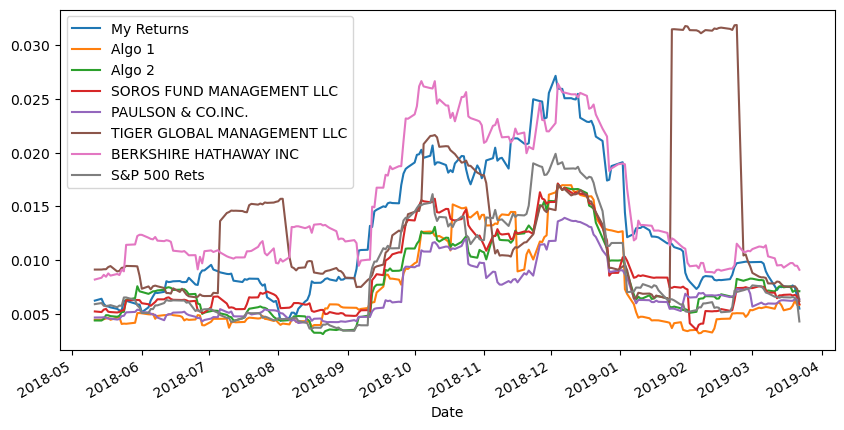

In [253]:
# Calculate rolling standard deviation
Rolling_21day_std=All_returns.rolling(window=21).std().plot.line(figsize=(10,5))

# Plot rolling standard deviation
Rolling_21day_std

### Calculate and plot the correlation

<AxesSubplot:>

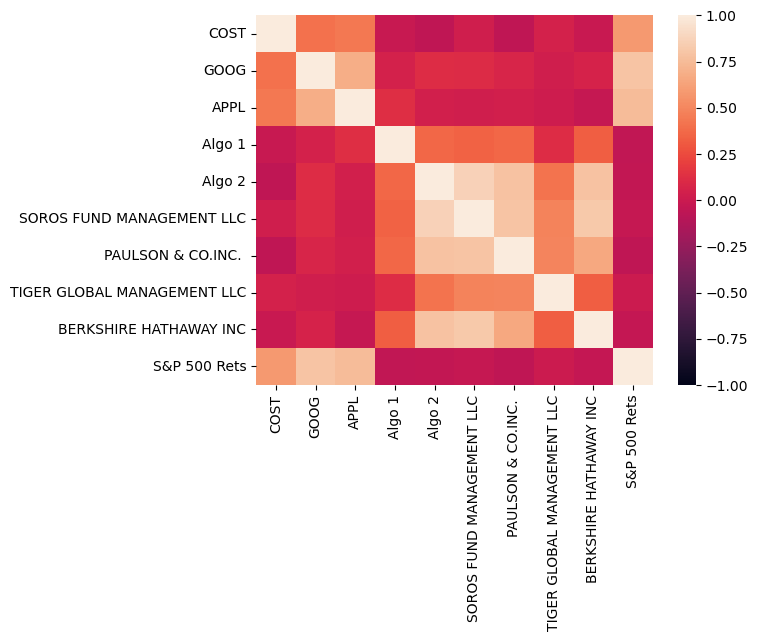

In [122]:
# Calculate and plot the correlation
Recorrelation=All_returns.corr().copy()
sns.heatmap(Recorrelation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [151]:
Rolling_var=All_returns[]

Date
2019-04-22         NaN
2019-04-18         NaN
2019-04-17         NaN
2019-04-16         NaN
2019-04-15         NaN
                ...   
2018-05-17    0.000012
2018-05-16    0.000011
2018-05-15    0.000013
2018-05-14    0.000012
2018-05-11    0.000012
Length: 237, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [255]:
# Calculate Annualized Sharpe Ratios
All_sharpe=(All_returns.mean()*year)/((All_returns).std()*np.sqrt(year))

<AxesSubplot:>

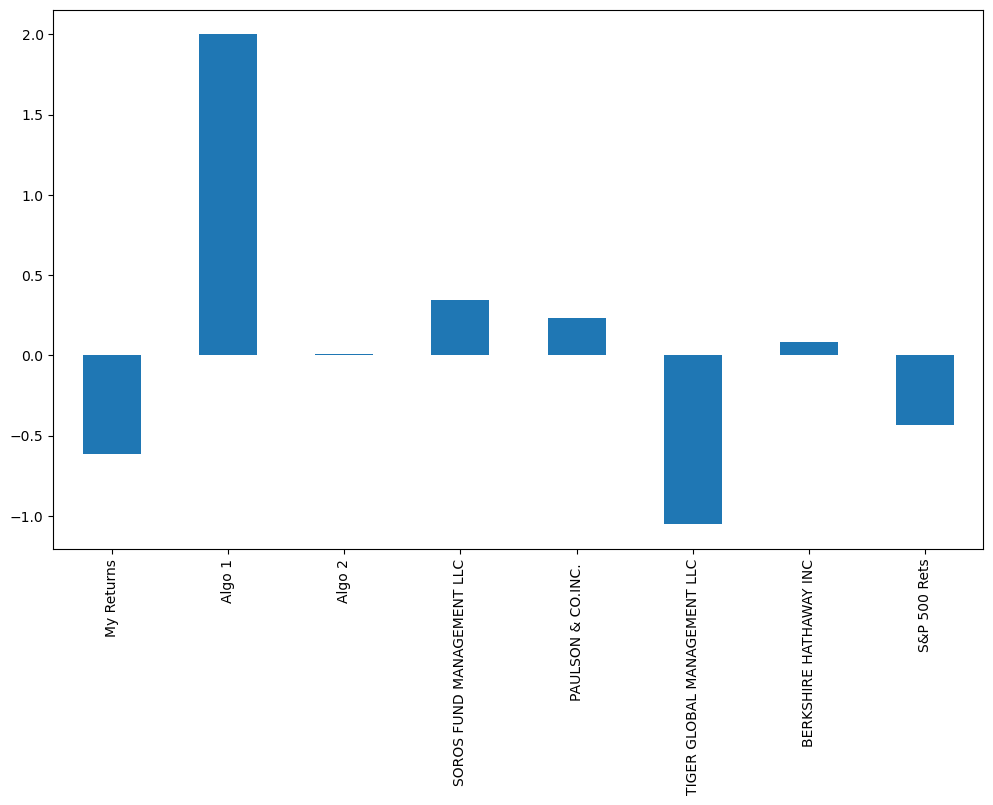

In [256]:
# Visualize the sharpe ratios as a bar plot
All_sharpe.plot.bar(figsize=(12,7))

### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio performance when compared to all returns came in second to last, right behind Tiger Global.
How ever the first Algorithmic trading portfolio had the least deviation which resulted in a better Sharpe Ratio than all others including the S&P 500.